<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe67701-uncertainty-quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification);
content is available [on Github](git@github.com:ndcbe/cbe67701-uncertainty-quantification.git).*

<!--NAVIGATION-->
< [3.0 Input Parameter Distributions](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.00-Input-Parameter-Distributions.html) | [Contents](toc.html) | [3.2 Meaningful Title Goes Here](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.02-Contributed-Example.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/03.01-Contributed_Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.01-Contributed_Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.1 3.1 Copulas 

Created by Krishnendu Mukherjee (kmukherj@nd.edu)

In [1]:
## installing copula library via pip
!pip install copulas

In [2]:
## import all needed Python libraries here
import numpy as np
import pandas as pd
from scipy import stats
import random
from copulas import random_seed
import matplotlib.pyplot as plt
# essential function for generating Normal copula and visualization
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d
from mpl_toolkits import mplot3d

## 3.1.1 Definition ##
Copulas can help to "link" Cumulative distribution function (CDF) to Joint distribution for any number of input parameters. 

 $$ F_{XY} = C(F_X (x), F_Y (y))  $$

Here, C is the copula function which takes marginal CDF for each variable and creates a joint CDF. 


*   Very useful in finance and insurance industries for modeling risk distribution.
*   They allow one to easily model and estimate the distribution of random vectors by estimating marginals and copulae separately.


## Normal Copula ##
One of the simplest Copula in the Normal/Gaussian copula:

$$ C_N (u,v) = \Phi_R (\Phi^{-1}(u), \Phi^{-1}(v)) $$

Where, $u$ and $v$ are the random variables, $R$ the correlation matrix and $C_N$ is the normal copula. 

In [3]:
## https://pypi.org/project/copulas/#:~:text=Copulas%20is%20a%20Python%20library,following%20the%20same%20statistical%20properties. 
## Defining A trivariate correlated distribution, 2 beta and 1 Normal    
def sample_trivariate_xyz(size=1000, seed=42):
    """Sample from three dimensional toy dataset.
    The output is a DataFrame containing three columns:
    * ``x``: Beta distribution with a=0.1 and b=0.1
    * ``y``: Beta distribution with a=0.1 and b=0.5
    * ``z``: Normal distribution + 10 times ``y``
    Args:
        size (int):
            Amount of samples to generate. Defaults to 1000.
        seed (int):
            Random seed to use. Defaults to 42.
    Retruns:
        pandas.DataFrame:
            DataFrame with three columns, ``x``, ``y`` and ``z``.
    """
    with random_seed(seed):
        x = stats.beta.rvs(a=0.1, b=0.1, size=size)
        y = stats.beta.rvs(a=0.1, b=0.5, size=size)
        return pd.DataFrame({
            'x': x,
            'y': y,
            'z': np.random.normal(size=size) + y*10
    })
        
# Defining a function for 3 dimensional plot for visualization, 
# followed by a comparision plot

def scatter_3d(data, title="Original dataset", columns=None, fig=None, position=None):
    """Plot 3 dimensional data in a scatter plot."""
    fig = fig or plt.figure()
    position = position or 111

    ax = fig.add_subplot(position, projection='3d')
    ax.scatter(*(
        data[column]
        for column in columns or data.columns
    ))
    ax.set_xlabel('X',Fontsize="10")
    ax.set_ylabel('Y',Fontsize="10")
    ax.set_zlabel('Z',Fontsize="10")
    
    if title:
        ax.set_title(title,Fontsize="20")
        ax.title.set_position([.5, 1.05])

    return ax
def scatter_3d_2(data, title="Syntheic dataset", columns=None, fig=None, position=None):
    """Plot 3 dimensional data in a scatter plot."""
    fig = fig or plt.figure()
    position = position or 111

    ax = fig.add_subplot(position, projection='3d')
    ax.scatter(*(
        data[column]
        for column in columns or data.columns
    ))
    ax.set_xlabel('X',Fontsize="10")
    ax.set_ylabel('Y',Fontsize="10")
    ax.set_zlabel('Z',Fontsize="10")
    
    if title:
        ax.set_title(title,Fontsize="20")
        ax.title.set_position([.5, 1.05])

    return ax

# defining another trivariate distribution for which outputs age, income and health 
# expectancy 
def sample_trivariate_age_income_health(size=100, seed=42):
    """Sample from a bivariate toy dataset.
    This dataset contains two columns which correspond to the simulated age and
    income which are positively correlated with outliers.
    Args:
        size (int):
            Amount of samples to generate. Defaults to 100.
        seed (int):
            Random seed to use. Defaults to 42.
    Retruns:
        pandas.DataFrame:
            DataFrame with two columns, ``age`` and ``income``.
    """
    with random_seed(seed):
        age = stats.norm.rvs(25, 15.0, size=size)
        income = 2.3*(age**2) 
        health_expec = abs(age) + 2*np.log(income) 
    return pd.DataFrame({
        "age": age,
        "income": income,
        "health_expec" : health_expec
    })

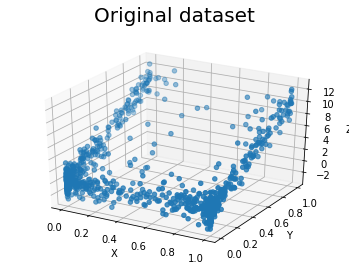

In [ ]:
## Sampling and visualizing the input tri-variate normal distribution dataset
data = sample_trivariate_xyz()
scatter_3d(data)
# Tip: Any .csv can be used as input with pd.dataframe command

In [ ]:
## Fitting a gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(data)

# Sampling synthetic data
synthetic_data = copula.sample(len(data))

# Plotting the real and the synthetic data to compare
scatter_3d_2(synthetic_data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


<!--NAVIGATION-->
< [3.0 Input Parameter Distributions](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.00-Input-Parameter-Distributions.html) | [Contents](toc.html) | [3.2 Meaningful Title Goes Here](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.02-Contributed-Example.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/03.01-Contributed_Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.01-Contributed_Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>